<a href="https://colab.research.google.com/github/sryksm/Sentiment-Analysis---IndoAI/blob/main/Sentiment%20Analysis%202019%20President%20Election.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Corpus and Libs

In [ ]:
from google.colab import files


kamusalay = files.upload()

Saving new_kamusalay.csv to new_kamusalay.csv


In [ ]:
import io
alay = pd.read_csv(io.BytesIO(kamusalay['new_kamusalay.csv']), encoding='latin-1', names=['ori', 'replacement'])

In [ ]:
from google.colab import files


rawdata = files.upload()

Saving tweet.csv to tweet.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import io
df = pd.read_csv(io.BytesIO(rawdata['tweet.csv']), index_col=0)

In [ ]:
df.head(10)

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...
5,netral,"Yg bisikin pak jokowi, cm mikirin perputaran d..."
6,positif,Masa tenang msih ngoceh aja..ttp jokowi harga ...
7,positif,#UASdifitnahKejiBalasDiTPS kerjasa ekonomi b...
8,netral,"Iya bener Aa, kita MANTAP kan pilihan ke Pemim..."
9,negatif,Prabowo-Sandi Sepakat Tak Ambil Gaji karena Ne...


In [ ]:
print("There are {} observations and {} features in this corpus dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} kinds of sentiment in this corpus dataset namely {}.".format(len(df.sentimen.unique()),
                                                                           ", ".join(df.sentimen.unique())))

There are 1815 observations and 2 features in this corpus dataset. 

There are 3 kinds of sentiment in this corpus dataset namely negatif, netral, positif.


## EDA

In [ ]:
df.isnull().sum()

sentimen    0
tweet       0
dtype: int64

In [ ]:
df.sentimen.value_counts()

positif    612
netral     607
negatif    596
Name: sentimen, dtype: int64

In [ ]:
import plotly.express as px
fig = px.pie(df, names='sentimen', title ='Pie chart of different sentiments of 2019 President election tweets')
fig.show()

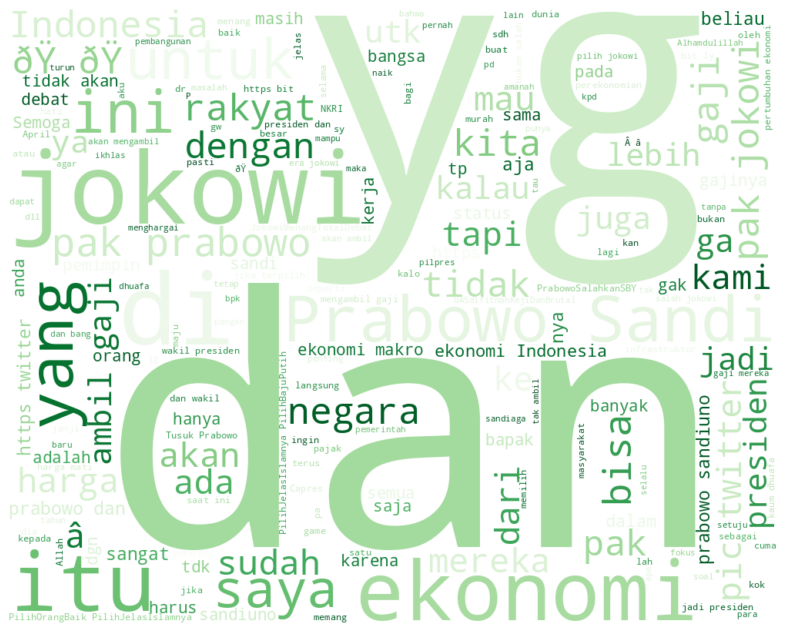

In [ ]:
positive = df[df['sentimen'] == 'positif']

all_text = ' '.join(word for word in positive['tweet'])
wordcloud = WordCloud(colormap='Greens', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

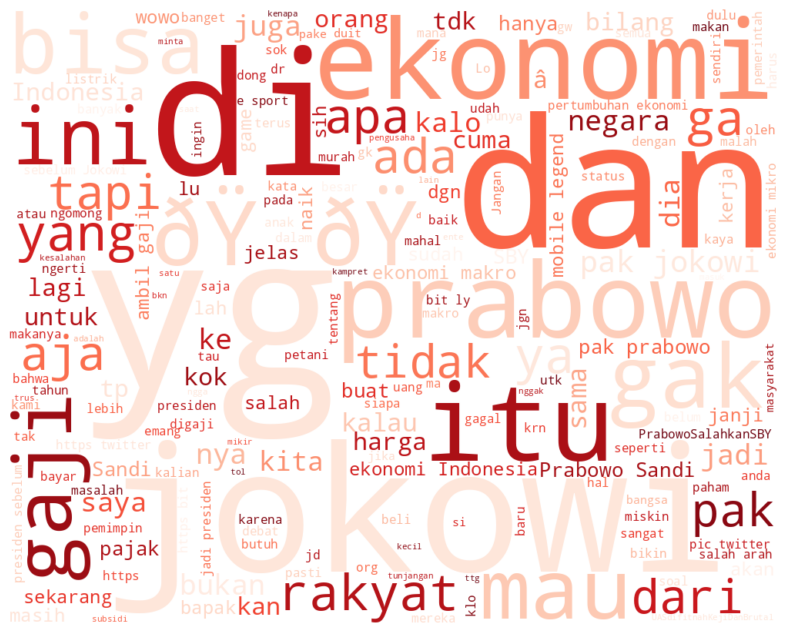

In [ ]:
negative = df[df['sentimen'] == 'negatif']

all_text = ' '.join(word for word in negative['tweet'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Preprocessing

In [ ]:
import re

# cleaning text
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text =  url_pattern.sub(r'', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, " ")

    # remove extra whitespace
    text = re.sub('  +', ' ', text)
    return text

    # remove non-ascii chars
    text = ' '.join([i for i in text if ord(i) < 128])

    # lowercase
    text = text.lower()
    return text

In [ ]:
cleaning_text('Setelah Jokowi Bertemu Megawati, paginya kami para relawan berkonsolidasi, hingga larut malam.. ane smpai begadang cuy.. tapi okelah! TERBAYAR TUNTAS!! ... http://fb.me/13sZi5lbC')

'Setelah Jokowi Bertemu Megawati paginya kami para relawan berkonsolidasi hingga larut malam ane smpai begadang cuy tapi okelah TERBAYAR TUNTAS '

In [ ]:
# word standardizing
slang_dict = dict(zip(alay['ori'], alay['replacement']))

def normalize_slang(text):
    return ' '.join([slang_dict[word] if word in slang_dict else word for word in text.split(' ')])

In [ ]:
# stopword treatment
import requests
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

sastrawi_stopword = requests.get("https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt")
nltk_stopword = stopwords.words('indonesian')
custom_stopword = ['com','pak','he',17,14,0,000,10,5,1,25,'k','pek','nya','of','is','lap','aku','yuk','dan','in','di','oke','coy','buat','e','yg','sih','jika','gue']
stopwordz = sastrawi_stopword.text.split('\n') + nltk_stopword + custom_stopword

print(f'Stopwords: {list(set(stopwordz))[:5]}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Stopwords: [0, 'mungkin', 'ibarat', 1, 'sela']


In [ ]:
# stopwords removal
from nltk import word_tokenize

def remove_stopword(text, stop_words=stopwordz):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [ ]:
!pip install nlp-id

In [ ]:
!pip install PySastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [ ]:
# Lemmatization
from nlp_id.lemmatizer import Lemmatizer

def lemmatizerz(text):
  lemmatizer = Lemmatizer()
  return lemmatizer.lemmatize(text)

In [ ]:
# Tokenization phrase
from nlp_id.tokenizer import PhraseTokenizer

def tokenizerz(text):
  tokenizer = PhraseTokenizer()
  return tokenizer.tokenize(text)

In [ ]:
# Tokenization by word
from nlp_id.tokenizer import Tokenizer

def tokenizer_word(text):
    tokenizer = Tokenizer()
    return tokenizer.tokenize(text)

In [ ]:
tokenizer_word('Lionel Messi pergi ke pasar di daerah Jakarta Pusat.')

['Lionel',
 'Messi',
 'pergi',
 'ke',
 'pasar',
 'di',
 'daerah',
 'Jakarta',
 'Pusat',
 '.']

In [ ]:
# Trial1
text = 'Setelah Jokowi Bertemu Megawati, paginya kami para relawan berkonsolidasi, hingga larut malam.. ane smpai begadang cuy.. tapi okelah! TERBAYAR TUNTAS!! ... http://fb.me/13sZi5lbC'
print(f'Original text: \n{text}\n')

# cleaning text and lowercase
text = cleaning_text(text)
print(f'Cleaned text: \n{text}\n')

# normalize slang
text = normalize_slang(text)
print(f'Normalize slang: \n{text}\n')

# remove stopwords
text = remove_stopword(text)
print(f'Removed stopword: \n{text}\n')

# lemmatization
text = lemmatizerz(text)
print(f'Lemmatized: \n{text}\n')

# tokenization
text = tokenizerz(text)
print(f'Tokenized by phrase: \n{text}')

Original text: 
Setelah Jokowi Bertemu Megawati, paginya kami para relawan berkonsolidasi, hingga larut malam.. ane smpai begadang cuy.. tapi okelah! TERBAYAR TUNTAS!! ... http://fb.me/13sZi5lbC

Cleaned text: 
Setelah Jokowi Bertemu Megawati paginya kami para relawan berkonsolidasi hingga larut malam ane smpai begadang cuy tapi okelah TERBAYAR TUNTAS 

Normalize slang: 
Setelah Jokowi Bertemu Megawati paginya kami para relawan berkonsolidasi hingga larut malam saya sampai begadang coy tapi okelah TERBAYAR TUNTAS 

Removed stopword: 
Setelah Jokowi Bertemu Megawati paginya relawan berkonsolidasi larut malam begadang coy okelah TERBAYAR TUNTAS

Lemmatized: 
telah jokowi temu megawati pagi rawan konsolidasi larut malam begadang coy oke bayar tuntas

Tokenized by phrase: 
['telah', 'jokowi', 'temu', 'megawati', 'pagi rawan konsolidasi larut', 'malam', 'begadang', 'coy', 'oke', 'bayar', 'tuntas']


In [ ]:
# Trial2
text = 'Setelah Jokowi Bertemu Megawati, paginya kami para relawan berkonsolidasi, hingga larut malam.. ane smpai begadang cuy.. tapi okelah! TERBAYAR TUNTAS!! ... http://fb.me/13sZi5lbC'
print(f'Original text: \n{text}\n')

# cleaning text and lowercase
text = cleaning_text(text)
print(f'Cleaned text: \n{text}\n')

# normalize slang
text = normalize_slang(text)
print(f'Normalize slang: \n{text}\n')

# remove stopwords
text = remove_stopword(text)
print(f'Removed stopword: \n{text}\n')

# stemming
text = stemming(text)
print(f'Stemming: \n{text}\n')

# tokenization
text = tokenizer_word(text)
print(f'Tokenized by word: \n{text}')

Original text: 
Setelah Jokowi Bertemu Megawati, paginya kami para relawan berkonsolidasi, hingga larut malam.. ane smpai begadang cuy.. tapi okelah! TERBAYAR TUNTAS!! ... http://fb.me/13sZi5lbC

Cleaned text: 
Setelah Jokowi Bertemu Megawati paginya kami para relawan berkonsolidasi hingga larut malam ane smpai begadang cuy tapi okelah TERBAYAR TUNTAS 

Normalize slang: 
Setelah Jokowi Bertemu Megawati paginya kami para relawan berkonsolidasi hingga larut malam saya sampai begadang coy tapi okelah TERBAYAR TUNTAS 

Removed stopword: 
Setelah Jokowi Bertemu Megawati paginya relawan berkonsolidasi larut malam begadang okelah TERBAYAR TUNTAS

Stemming: 
telah jokowi temu megawati pagi rawan konsolidasi larut malam begadang oke bayar tuntas

Tokenized by word: 
['telah', 'jokowi', 'temu', 'megawati', 'pagi', 'rawan', 'konsolidasi', 'larut', 'malam', 'begadang', 'oke', 'bayar', 'tuntas']


In [ ]:
# Pipeline for preprocessing

def preprocessing(text):
    output = cleaning_text(text)
    output = normalize_slang(output)
    output = remove_stopword(output)
    output = stemming(output)
    output = tokenizer_word(output)
    return output

In [ ]:
preprocessing('Setelah Jokowi Bertemu Megawati, paginya kami para relawan berkonsolidasi, hingga di larut malam.. ane smpai begadang cuy.. tapi okelah! TERBAYAR TUNTAS!! ... http://fb.me/13sZi5lbC')

['telah',
 'jokowi',
 'temu',
 'megawati',
 'pagi',
 'rawan',
 'konsolidasi',
 'larut',
 'malam',
 'begadang',
 'oke',
 'bayar',
 'tuntas']

In [ ]:
# implement preprocessing
dfclean = df.copy()
dfclean['new tweet'] = df['tweet'].apply(lambda x: preprocessing(x))

In [ ]:
dfclean.head(10)

,sentimen,tweet,new tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,"[kata, indonesia, harga, bangsa, asing, berita..."
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...","[batu, langka, tasbih, jokowi, hadiah, habib, ..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....","[di, era, jokowi, ekonomi, indonesia, 01indone..."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...","[bagi, sumatera, selatan, asi, games, dampak, ..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,"[negara, utang, bangun, infrastruktur, pakai, ..."
5,netral,"Yg bisikin pak jokowi, cm mikirin perputaran d...","[yg, bisikin, jokowi, pikir, putar, duit, golo..."
6,positif,Masa tenang msih ngoceh aja..ttp jokowi harga ...,"[masa, tenang, oceh, jokowi, harga, mati]"
7,positif,#UASdifitnahKejiBalasDiTPS kerjasa ekonomi b...,"[uasdifitnahkejibalasditps, kerjasa, ekonomi, ..."
8,netral,"Iya bener Aa, kita MANTAP kan pilihan ke Pemim...","[iya, aa, mantap, pilih, pimpin, solusi, salah..."
9,negatif,Prabowo-Sandi Sepakat Tak Ambil Gaji karena Ne...,"[prabowo, sandi, sepakat, tak, ambil, gaji, ne..."


In [ ]:
#adding a column containing tweet in string
a = dfclean['new tweet'].apply(lambda x: ' '.join(x))
b = ' '.join(a)
document = b.split()
a = pd.DataFrame(a)
dfclean['string tweet'] = a['new tweet']
dfclean

,sentimen,tweet,new tweet,string tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,"[kata, indonesia, harga, bangsa, asing, berita...",kata indonesia harga bangsa asing berita hoaks...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...","[batu, langka, tasbih, jokowi, hadiah, habib, ...",batu langka tasbih jokowi hadiah habib luthfi ...
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....","[di, era, jokowi, ekonomi, indonesia, 01indone...",di era jokowi ekonomi indonesia 01indonesiamaj...
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...","[bagi, sumatera, selatan, asi, games, dampak, ...",bagi sumatera selatan asi games dampak ekonomi...
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,"[negara, utang, bangun, infrastruktur, pakai, ...",negara utang bangun infrastruktur pakai masyar...
...,...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...,"[negarawan, sejati, bangga, depan, harga, bang...",negarawan sejati bangga depan harga bangsa dau...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...,"[1, hrs, ceramah, damai, indonesia, 2, ekonomi...",1 hrs ceramah damai indonesia 2 ekonomi baik p...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...,"[mari, bangun, bangsa, dukung, ekonomi, negara...",mari bangun bangsa dukung ekonomi negara pak j...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...,"[bantu, maju, ekonomi, bangsa, pak, jokowi]",bantu maju ekonomi bangsa pak jokowi


In [ ]:
from collections import Counter

word_count = Counter(c)

# Find the most frequent word
most_common_word = word_count.most_common(50)
most_common_word

[('ekonomi', 1028),
 ('prabowo', 738),
 ('jokowi', 688),
 ('gaji', 551),
 ('harga', 473),
 ('presiden', 468),
 ('sandi', 388),
 ('salah', 333),
 ('indonesia', 332),
 ('ambil', 263),
 ('rakyat', 238),
 ('pilih', 227),
 ('pak', 203),
 ('negara', 198),
 ('pic', 167),
 ('twitter', 167),
 ('kerja', 158),
 ('orang', 142),
 ('debat', 141),
 ('pimpin', 132),
 ('bangun', 124),
 ('tumbuh', 112),
 ('janji', 109),
 ('makro', 105),
 ('perintah', 97),
 ('5', 96),
 ('pajak', 93),
 ('prabowosalahkansby', 90),
 ('02', 88),
 ('arah', 87),
 ('bilang', 85),
 ('anak', 84),
 ('tingkat', 81),
 ('game', 78),
 ('calon', 75),
 ('turun', 75),
 ('pikir', 74),
 ('hasil', 72),
 ('bangsa', 71),
 ('tak', 71),
 ('jika', 68),
 ('dukung', 68),
 ('nyata', 68),
 ('usaha', 68),
 ('pilihorangbaik', 67),
 ('wakil', 64),
 ('menang', 63),
 ('terima', 63),
 ('bayar', 62),
 ('1', 62)]

## Fiture Extraction

In [ ]:
#saving dataframe as CSV file format
dfclean.to_csv('preprocessed2.csv')
!cp preprocessed2.csv "drive/My Drive/"

In [ ]:
df_pp = pd.read_csv('/content/preprocessed2.csv')

In [ ]:
#vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(df_pp['string tweet'])
vector = vectorizer.transform(df_pp['string tweet'])
print(vector)

  (0, 2399)	0.3611000253160374
  (0, 2134)	0.3478697309574171
  (0, 1775)	0.18903866529048546
  (0, 1684)	0.39448925978179533
  (0, 1617)	0.16968981262965754
  (0, 769)	0.35823756085423486
  (0, 633)	0.38984895357963456
  (0, 511)	0.2901995464419644
  (0, 411)	0.40485708967861317
  (1, 4415)	0.37142027852044496
  (1, 2839)	0.39175547322222126
  (1, 2605)	0.39175547322222126
  (1, 2473)	0.3569922282677044
  (1, 1996)	0.1056115150423506
  (1, 1617)	0.12653428019302876
  (1, 1585)	0.34580096304739405
  (1, 1575)	0.39175547322222126
  (1, 551)	0.3569922282677044
  (2, 4795)	0.4915108253509629
  (2, 4683)	0.21270833035485176
  (2, 3484)	0.21270833035485176
  (2, 2008)	0.2841252386613821
  (2, 2004)	0.43385460669281
  (2, 1996)	0.13250409113132197
  (2, 1775)	0.17685652432861854
  :	:
  (1812, 2710)	0.5048734867298822
  (1812, 2215)	0.2787908469946901
  (1812, 1996)	0.16210473396794917
  (1812, 1253)	0.1315350453167987
  (1812, 1212)	0.3357306068279916
  (1812, 513)	0.29423852571287223
  (18

In [ ]:
from sklearn.model_selection import train_test_split
X = df_pp['string tweet']
y = df_pp['sentimen']
y = y.map({'negatif':0, 'netral':1, 'positif':2})


X_train, X_test, y_train, y_test = train_test_split(vector,y,test_size = 0.2)

## random Forest Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=0)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
#Evaluation Metric
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print("Accuracy Score Testing :")
print(accuracy_score(y_test, predictions))

print("Confusion Matrix : ")
print(confusion_matrix(y_test,predictions))

print("Classification Report : ")
print(classification_report(y_test,predictions))

Accuracy Score Testing :
0.6033057851239669
Confusion Matrix : 
[[83 21 21]
 [22 78 19]
 [35 26 58]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.59      0.66      0.63       125
           1       0.62      0.66      0.64       119
           2       0.59      0.49      0.53       119

    accuracy                           0.60       363
   macro avg       0.60      0.60      0.60       363
weighted avg       0.60      0.60      0.60       363



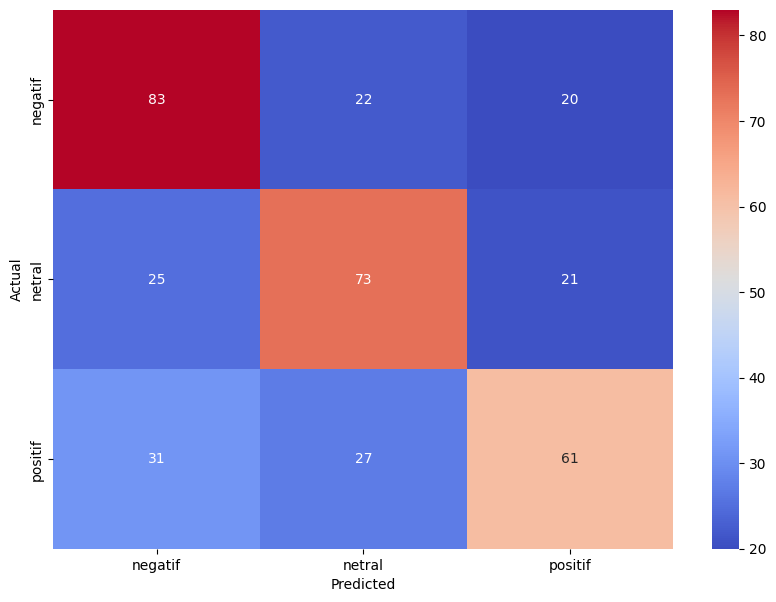

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 2nd Feature Extraction & LSTM Modeling

In [ ]:
!pip install Keras-Preprocessing

In [ ]:
!pip install keras --upgrade

In [ ]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras_preprocessing.text import Tokenizer
from keras_preprocessing import sequence
from keras_preprocessing.sequence import pad_sequences
# from keras.utils.data_utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

In [ ]:
max_words = 750
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train2)
sequences = tok.texts_to_sequences(X_train2)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [ ]:
#setup layers and activation function
def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 50)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [ ]:
from keras.optimizers import Adam
from keras.metrics import Accuracy, CategoricalAccuracy, Precision, Recall, AUC

In [ ]:
model = RNN()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=[CategoricalAccuracy(), Precision(), Recall(), AUC()])

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ inputs (InputLayer)                │ (None, 150)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ embedding_9 (Embedding)            │ (None, 150, 50)               │      37,500 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_8 (LSTM)                      │ (None, 64)                    │      29,440 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ FC1 (Dense)                        │ (None, 256)                   │      16,640 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_16 (Activation)         │ (None, 256)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_8 (Dropout)                │ (None, 256)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ out_layer (Dense)                  │ (None, 1)                     │         257 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_17 (Activation)         │ (None, 1)                     │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 83,837 (327.49 KB)

 Trainable params: 83,837 (327.49 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(sequences_matrix, y_train2,batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - auc_8: 0.7229 - categorical_accuracy: 1.0000 - loss: 0.0000e+00 - precision_8: 0.8187 - recall_8: 0.6360 - val_auc_8: 0.6794 - val_categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_precision_8: 0.7817 - val_recall_8: 0.5842
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - auc_8: 0.7588 - categorical_accuracy: 1.0000 - loss: 0.0000e+00 - precision_8: 0.7394 - recall_8: 0.8684 - val_auc_8: 0.7312 - val_categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_precision_8: 0.7074 - val_recall_8: 0.8526


In [ ]:
test_sequences = tok.texts_to_sequences(X_test2)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix, y_test2)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - auc_8: 0.7583 - categorical_accuracy: 1.0000 - loss: 0.0000e+00 - precision_8: 0.7715 - recall_8: 0.9007


In [ ]:
#LSTM Evaluation
print('Test set\n  AUC score: {:0.2f}\n  Precision: {:0.2f}\n  Recall: {:0.2f}\n  Accuracy: {:.2f}'.format(accr[1],accr[3],accr[4],accr[2]))

Test set
  AUC score: 0.76
  Precision: 0.75
  Recall: 0.89
  Accuracy: 1.00
